## Convolutional Neural Networks for Image Classification

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#getting the data
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

/Users/jaydip/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jaydip/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jaydip/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/jaydip/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework

11493376/11490434 [==============================] - 6s 1us/step


### Visualizing the Image Data

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
single_image = x_train[0]

In [5]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
single_image.shape

(28, 28)

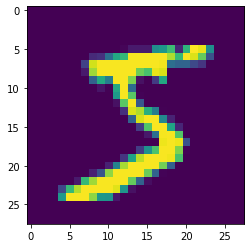

In [8]:
plt.imshow(single_image)

### Data Preprocessing

looks like labels are categories of numbers. 

We need to translate this to be "one hot encoded", otherwise it will think this is some sort of regression problem on a continuous axis.

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train.shape

(60000,)

In [11]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [12]:
single_image.max()

255

In [13]:
single_image.min()

0

In [14]:
x_train = x_train/255
x_test = x_test/255

In [15]:
scaled_single = x_train[0]

In [16]:
scaled_single.max()

1.0

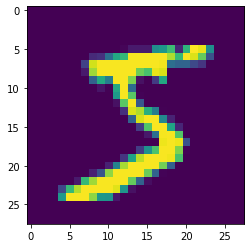

In [17]:
plt.imshow(scaled_single)

Data is 60,000 images stored in 28 by 28 pixel array formation.

This is correct for a CNN, but need to add one more dimension to dealing with 1 RGB channel, an color image would have 3 dimensions.

In [18]:
x_train.shape

(60000, 28, 28)

In [19]:
x_test.shape

(10000, 28, 28)

In [20]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [21]:
x_train.shape

(60000, 28, 28, 1)

In [22]:
x_test = x_test.reshape(10000,28,28,1)

In [23]:
x_test.shape

(10000, 28, 28, 1)

### Training the model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [25]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [27]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [28]:
model.fit(x_train,y_cat_train,epochs=200,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
60000/60000 [==============================] - 36s 600us/sample - loss: 0.1376 - acc: 0.9580 - val_loss: 0.0506 - val_acc: 0.9822
Epoch 2/200
60000/60000 [==============================] - 37s 615us/sample - loss: 0.0460 - acc: 0.9855 - val_loss: 0.0427 - val_acc: 0.9868
Epoch 3/200
60000/60000 [==============================] - 42s 705us/sample - loss: 0.0298 - acc: 0.9907 - val_loss: 0.0400 - val_acc: 0.9869
Epoch 4/200
60000/60000 [==============================] - 39s 654us/sample - loss: 0.0205 - acc: 0.9935 - val_loss: 0.0370 - val_acc: 0.9881
Epoch 5/200
60000/60000 [==============================] - 45s 748us/sample - loss: 0.0133 - acc: 0.9956 - val_loss: 0.0376 - val_acc: 0.9883
Epoch 6/200
60000/60000 [==============================] - 41s 689us/sample - loss: 0.0100 - acc: 0.9963 - val_loss: 0.0400 - val_acc: 0.9872
Epoch 7/200
60000/60000 [=========================

### Model evaluation

In [29]:
losses = pd.DataFrame(model.history.history)

In [30]:
losses.head()

,loss,acc,val_loss,val_acc
0,0.137597,0.958017,0.050588,0.9822
1,0.045992,0.985467,0.042713,0.9868
2,0.029830,0.990667,0.039980,0.9869
3,0.020513,0.993500,0.036964,0.9881
4,0.013253,0.995617,0.037563,0.9883


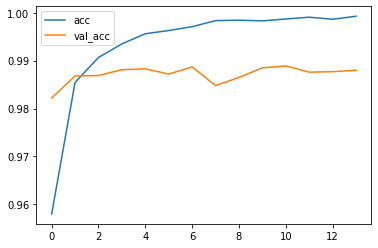

In [32]:
losses[['acc','val_acc']].plot()

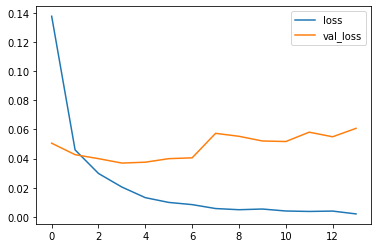

In [33]:
losses[['loss','val_loss']].plot()

In [34]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'acc']
[0.06075532480461247, 0.988]


In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
predictions = model.predict_classes(x_test)

In [37]:
y_cat_test.shape

(10000, 10)

In [38]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [39]:
predictions[0]

7

In [40]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [42]:
confusion_matrix(y_test,predictions)

array([[ 978,    0,    0,    0,    0,    0,    2,    0,    0,    0],
       [   3, 1126,    1,    0,    1,    0,    3,    1,    0,    0],
       [   3,    1, 1017,    3,    0,    0,    1,    4,    3,    0],
       [   0,    0,    1,  997,    0,    8,    0,    2,    2,    0],
       [   1,    0,    0,    0,  967,    0,    2,    0,    1,   11],
       [   2,    0,    1,    4,    0,  881,    4,    0,    0,    0],
       [   4,    2,    0,    0,    1,    1,  949,    0,    1,    0],
       [   0,    3,    5,    3,    0,    0,    0, 1011,    1,    5],
       [   6,    1,    2,    1,    0,    1,    4,    0,  957,    2],
       [   0,    1,    0,    0,    1,    1,    1,    4,    4,  997]])

In [43]:
import seaborn as sns

/Users/jaydip/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


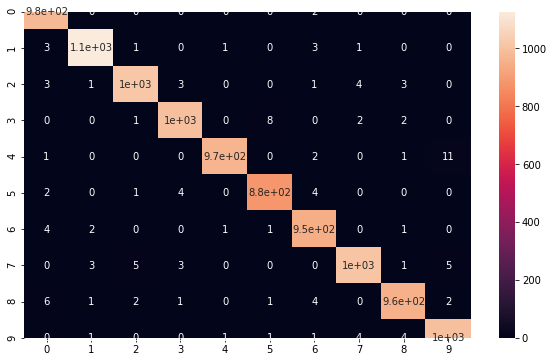

In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

### Predicting Image

In [46]:
my_number = x_test[0]

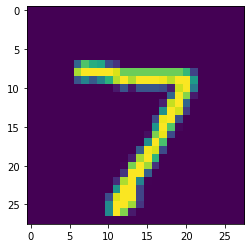

In [47]:
plt.imshow(my_number.reshape(28,28))

In [48]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([7])